In [1]:
from datasets import LungDataset, LungInfectedDataset, LungCovidDataset
from densenet import DenseNet
import utils

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms

### Classifier 1 (Normal/Infected)

In [2]:
# Define data loader arguments
train_transform = transforms.Compose([
    transforms.RandomResizedCrop((150, 150), scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333)),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])

dataloader_args = {
    'dataset'        : LungInfectedDataset,
    'root_dir'       : './dataset',
    'train_transform': train_transform,
    'test_transform' : test_transform,
    'batch_size'     : 64,
    'shuffle'        : True,
}

In [3]:
# Define model arguments
model_args = {
    'num_input_channels': 1,
    'growth_rate'       : 8,
    'block_config'      : (4, 8, 16, 12),
    'num_init_features' : 16,
    'bn_size'           : 4,
    'drop_rate'         : 0,
    'num_classes'       : 2,
}

In [4]:
# Define training arguments
def lr_scheduler(epoch, learning_rate):
    if epoch % 20 == 0:
        learning_rate /= 10
    return learning_rate

training_args = {
    'device'       :'cuda',
    'epochs'       : 50,
    'optimizer'    : 'Adam',
    'learning_rate': 0.01,
    'lr_scheduler' : lr_scheduler,
    'save_interval': 30,
    'model_path'   : './models/dual-binary-classifier-1.pt',
    'history_path' : './history/dual-binary-classifier-1.pickle',
}

In [5]:
# Create data loaders
train_loader, test_loader, val_loader = utils.get_dataloaders(**dataloader_args)

In [6]:
# Instantiate model
model = DenseNet(**model_args)

In [7]:
# Carry out training on the model
history = utils.train_model(model, train_loader, test_loader, **training_args)

[Sun Mar 21 14:34:24 2021] Training started



[Sun Mar 21 14:34:39 2021] Time elapsed: 0:14 - loss: 0.431 - acc: 0.801 - recall: 0.713 - f1: 0.712 - test_loss: 1.022 - test_acc: 0.614 - test_recall: 0.500 - test_f1: 0.379



[Sun Mar 21 14:34:54 2021] Time elapsed: 0:29 - loss: 0.368 - acc: 0.845 - recall: 0.771 - f1: 0.781 - test_loss: 3.699 - test_acc: 0.380 - test_recall: 0.500 - test_f1: 0.274



[Sun Mar 21 14:35:08 2021] Time elapsed: 0:43 - loss: 0.347 - acc: 0.855 - recall: 0.794 - f1: 0.798 - test_loss: 1.159 - test_acc: 0.484 - test_recall: 0.545 - test_f1: 0.474



[Sun Mar 21 14:35:22 2021] Time elapsed: 0:57 - loss: 0.347 - acc: 0.850 - recall: 0.784 - f1: 0.790 - test_loss: 1.166 - test_acc: 0.620 - test_recall: 0.519 - test_f1: 0.449



[Sun Mar 21 14:35:36 2021] Time elapsed: 1:11 - loss: 0.341 - acc: 0.855 - recall: 0.799 - f1: 0.802 - test_loss: 0.434 - test_acc: 0.829 - test_recall: 0.794 - test_f1: 0.804



[Sun Mar 21 14:35:51 2021] Time elapsed: 1:26 - loss: 0.321 - acc: 0.862 - recall: 0.809 - f1: 0.812 - test_loss: 0.343 - test_acc: 0.851 - test_recall: 0.838 - test_f1: 0.837



[Sun Mar 21 14:36:05 2021] Time elapsed: 1:40 - loss: 0.300 - acc: 0.873 - recall: 0.828 - f1: 0.828 - test_loss: 0.623 - test_acc: 0.759 - test_recall: 0.690 - test_f1: 0.693



[Sun Mar 21 14:36:19 2021] Time elapsed: 1:55 - loss: 0.302 - acc: 0.870 - recall: 0.824 - f1: 0.824 - test_loss: 0.814 - test_acc: 0.664 - test_recall: 0.720 - test_f1: 0.654



[Sun Mar 21 14:36:34 2021] Time elapsed: 2:09 - loss: 0.284 - acc: 0.881 - recall: 0.843 - f1: 0.842 - test_loss: 0.750 - test_acc: 0.696 - test_recall: 0.598 - test_f1: 0.560



[Sun Mar 21 14:36:48 2021] Time elapsed: 2:24 - loss: 0.277 - acc: 0.886 - recall: 0.846 - f1: 0.845 - test_loss: 0.442 - test_acc: 0.810 - test_recall: 0.780 - test_f1: 0.787



[Sun Mar 21 14:37:03 2021] Time elapsed: 2:38 - loss: 0.267 - acc: 0.891 - recall: 0.856 - f1: 0.854 - test_loss: 0.378 - test_acc: 0.831 - test_recall: 0.838 - test_f1: 0.823



[Sun Mar 21 14:37:17 2021] Time elapsed: 2:52 - loss: 0.271 - acc: 0.882 - recall: 0.849 - f1: 0.843 - test_loss: 0.381 - test_acc: 0.881 - test_recall: 0.856 - test_f1: 0.867



[Sun Mar 21 14:37:31 2021] Time elapsed: 3:06 - loss: 0.258 - acc: 0.890 - recall: 0.857 - f1: 0.853 - test_loss: 0.567 - test_acc: 0.809 - test_recall: 0.750 - test_f1: 0.764



[Sun Mar 21 14:37:45 2021] Time elapsed: 3:21 - loss: 0.262 - acc: 0.888 - recall: 0.855 - f1: 0.850 - test_loss: 0.367 - test_acc: 0.831 - test_recall: 0.829 - test_f1: 0.821



[Sun Mar 21 14:38:00 2021] Time elapsed: 3:35 - loss: 0.249 - acc: 0.894 - recall: 0.862 - f1: 0.858 - test_loss: 0.518 - test_acc: 0.774 - test_recall: 0.720 - test_f1: 0.728



[Sun Mar 21 14:38:14 2021] Time elapsed: 3:49 - loss: 0.243 - acc: 0.897 - recall: 0.866 - f1: 0.863 - test_loss: 0.313 - test_acc: 0.890 - test_recall: 0.858 - test_f1: 0.873



[Sun Mar 21 14:38:28 2021] Time elapsed: 4:04 - loss: 0.241 - acc: 0.907 - recall: 0.879 - f1: 0.876 - test_loss: 0.937 - test_acc: 0.700 - test_recall: 0.605 - test_f1: 0.569



[Sun Mar 21 14:38:43 2021] Time elapsed: 4:18 - loss: 0.238 - acc: 0.900 - recall: 0.871 - f1: 0.866 - test_loss: 0.309 - test_acc: 0.857 - test_recall: 0.864 - test_f1: 0.851



[Sun Mar 21 14:38:57 2021] Time elapsed: 4:33 - loss: 0.231 - acc: 0.904 - recall: 0.874 - f1: 0.871 - test_loss: 0.452 - test_acc: 0.790 - test_recall: 0.828 - test_f1: 0.790



[Sun Mar 21 14:39:12 2021] Time elapsed: 4:47 - loss: 0.208 - acc: 0.916 - recall: 0.897 - f1: 0.888 - test_loss: 0.288 - test_acc: 0.919 - test_recall: 0.902 - test_f1: 0.910



[Sun Mar 21 14:39:26 2021] Time elapsed: 5:01 - loss: 0.197 - acc: 0.922 - recall: 0.901 - f1: 0.896 - test_loss: 0.262 - test_acc: 0.925 - test_recall: 0.912 - test_f1: 0.919



[Sun Mar 21 14:39:40 2021] Time elapsed: 5:15 - loss: 0.197 - acc: 0.918 - recall: 0.897 - f1: 0.892 - test_loss: 0.236 - test_acc: 0.923 - test_recall: 0.906 - test_f1: 0.914



[Sun Mar 21 14:39:55 2021] Time elapsed: 5:30 - loss: 0.193 - acc: 0.918 - recall: 0.895 - f1: 0.890 - test_loss: 0.279 - test_acc: 0.919 - test_recall: 0.902 - test_f1: 0.911



[Sun Mar 21 14:40:09 2021] Time elapsed: 5:44 - loss: 0.190 - acc: 0.926 - recall: 0.905 - f1: 0.902 - test_loss: 0.272 - test_acc: 0.921 - test_recall: 0.901 - test_f1: 0.913



[Sun Mar 21 14:40:23 2021] Time elapsed: 5:58 - loss: 0.193 - acc: 0.919 - recall: 0.895 - f1: 0.891 - test_loss: 0.213 - test_acc: 0.911 - test_recall: 0.906 - test_f1: 0.904



[Sun Mar 21 14:40:37 2021] Time elapsed: 6:13 - loss: 0.190 - acc: 0.925 - recall: 0.907 - f1: 0.901 - test_loss: 0.214 - test_acc: 0.923 - test_recall: 0.911 - test_f1: 0.916



[Sun Mar 21 14:40:52 2021] Time elapsed: 6:27 - loss: 0.179 - acc: 0.928 - recall: 0.907 - f1: 0.904 - test_loss: 0.232 - test_acc: 0.934 - test_recall: 0.917 - test_f1: 0.926



[Sun Mar 21 14:41:07 2021] Time elapsed: 6:42 - loss: 0.185 - acc: 0.927 - recall: 0.906 - f1: 0.902 - test_loss: 0.247 - test_acc: 0.911 - test_recall: 0.902 - test_f1: 0.904



[Sun Mar 21 14:41:21 2021] Time elapsed: 6:56 - loss: 0.176 - acc: 0.930 - recall: 0.912 - f1: 0.908 - test_loss: 0.278 - test_acc: 0.927 - test_recall: 0.906 - test_f1: 0.917



[Sun Mar 21 14:41:36 2021] Time elapsed: 7:11 - loss: 0.170 - acc: 0.928 - recall: 0.907 - f1: 0.905 - test_loss: 0.217 - test_acc: 0.927 - test_recall: 0.915 - test_f1: 0.920



[Sun Mar 21 14:41:50 2021] Time elapsed: 7:25 - loss: 0.172 - acc: 0.931 - recall: 0.912 - f1: 0.909 - test_loss: 0.251 - test_acc: 0.933 - test_recall: 0.921 - test_f1: 0.928



[Sun Mar 21 14:42:05 2021] Time elapsed: 7:40 - loss: 0.169 - acc: 0.930 - recall: 0.912 - f1: 0.908 - test_loss: 0.207 - test_acc: 0.925 - test_recall: 0.912 - test_f1: 0.919



[Sun Mar 21 14:42:19 2021] Time elapsed: 7:54 - loss: 0.186 - acc: 0.924 - recall: 0.901 - f1: 0.897 - test_loss: 0.258 - test_acc: 0.920 - test_recall: 0.888 - test_f1: 0.903



[Sun Mar 21 14:42:33 2021] Time elapsed: 8:08 - loss: 0.185 - acc: 0.928 - recall: 0.906 - f1: 0.905 - test_loss: 0.208 - test_acc: 0.931 - test_recall: 0.919 - test_f1: 0.924



[Sun Mar 21 14:42:48 2021] Time elapsed: 8:23 - loss: 0.174 - acc: 0.931 - recall: 0.913 - f1: 0.908 - test_loss: 0.179 - test_acc: 0.932 - test_recall: 0.918 - test_f1: 0.925



[Sun Mar 21 14:43:02 2021] Time elapsed: 8:37 - loss: 0.180 - acc: 0.925 - recall: 0.903 - f1: 0.900 - test_loss: 0.172 - test_acc: 0.929 - test_recall: 0.918 - test_f1: 0.921



[Sun Mar 21 14:43:16 2021] Time elapsed: 8:52 - loss: 0.175 - acc: 0.932 - recall: 0.914 - f1: 0.910 - test_loss: 0.241 - test_acc: 0.923 - test_recall: 0.903 - test_f1: 0.914



[Sun Mar 21 14:43:31 2021] Time elapsed: 9:06 - loss: 0.173 - acc: 0.931 - recall: 0.911 - f1: 0.908 - test_loss: 0.175 - test_acc: 0.932 - test_recall: 0.921 - test_f1: 0.925



[Sun Mar 21 14:43:45 2021] Time elapsed: 9:20 - loss: 0.173 - acc: 0.934 - recall: 0.916 - f1: 0.912 - test_loss: 0.192 - test_acc: 0.919 - test_recall: 0.917 - test_f1: 0.915



[Sun Mar 21 14:43:59 2021] Time elapsed: 9:35 - loss: 0.170 - acc: 0.930 - recall: 0.909 - f1: 0.907 - test_loss: 0.215 - test_acc: 0.933 - test_recall: 0.919 - test_f1: 0.927



[Sun Mar 21 14:44:14 2021] Time elapsed: 9:49 - loss: 0.159 - acc: 0.941 - recall: 0.923 - f1: 0.922 - test_loss: 0.228 - test_acc: 0.923 - test_recall: 0.905 - test_f1: 0.916



[Sun Mar 21 14:44:29 2021] Time elapsed: 10:04 - loss: 0.161 - acc: 0.938 - recall: 0.921 - f1: 0.917 - test_loss: 0.213 - test_acc: 0.933 - test_recall: 0.916 - test_f1: 0.926



[Sun Mar 21 14:44:43 2021] Time elapsed: 10:18 - loss: 0.172 - acc: 0.933 - recall: 0.918 - f1: 0.911 - test_loss: 0.225 - test_acc: 0.931 - test_recall: 0.912 - test_f1: 0.922



[Sun Mar 21 14:44:58 2021] Time elapsed: 10:33 - loss: 0.160 - acc: 0.939 - recall: 0.922 - f1: 0.918 - test_loss: 0.201 - test_acc: 0.936 - test_recall: 0.924 - test_f1: 0.929



[Sun Mar 21 14:45:12 2021] Time elapsed: 10:47 - loss: 0.161 - acc: 0.935 - recall: 0.919 - f1: 0.914 - test_loss: 0.208 - test_acc: 0.931 - test_recall: 0.915 - test_f1: 0.925



[Sun Mar 21 14:45:27 2021] Time elapsed: 11:02 - loss: 0.174 - acc: 0.935 - recall: 0.918 - f1: 0.913 - test_loss: 0.222 - test_acc: 0.930 - test_recall: 0.913 - test_f1: 0.922



[Sun Mar 21 14:45:41 2021] Time elapsed: 11:16 - loss: 0.158 - acc: 0.938 - recall: 0.922 - f1: 0.918 - test_loss: 0.214 - test_acc: 0.938 - test_recall: 0.928 - test_f1: 0.933



[Sun Mar 21 14:45:56 2021] Time elapsed: 11:31 - loss: 0.170 - acc: 0.932 - recall: 0.914 - f1: 0.910 - test_loss: 0.222 - test_acc: 0.927 - test_recall: 0.913 - test_f1: 0.921



[Sun Mar 21 14:46:10 2021] Time elapsed: 11:45 - loss: 0.156 - acc: 0.942 - recall: 0.926 - f1: 0.923 - test_loss: 0.224 - test_acc: 0.932 - test_recall: 0.911 - test_f1: 0.923



[Sun Mar 21 14:46:24 2021] Time elapsed: 11:59 - loss: 0.162 - acc: 0.935 - recall: 0.918 - f1: 0.914 - test_loss: 0.222 - test_acc: 0.930 - test_recall: 0.914 - test_f1: 0.924

[Sun Mar 21 14:46:24 2021] Training complete - Time elapsed: 11:59


In [8]:
# Save the results of training
utils.save_model(model, training_args['model_path'])

utils.save_history(history, training_args['history_path'])

In [6]:
# Load the results of training
model = utils.load_model(training_args['model_path'])

history = utils.load_history(training_args['history_path'])

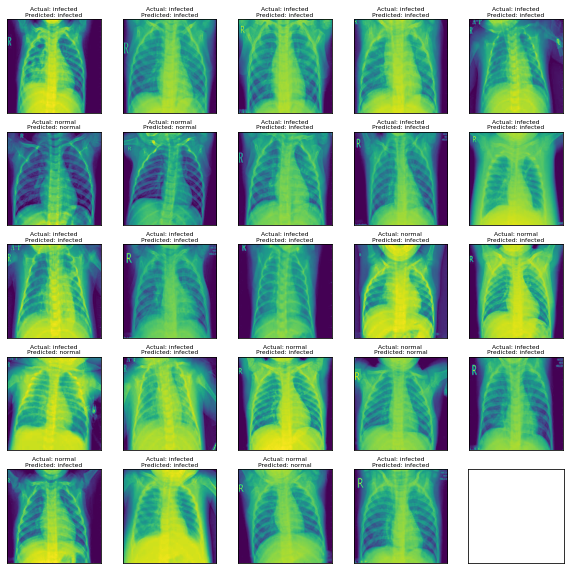

Validation loss: 0.590 - Validation accuracy: 0.792 - Validation F1-score: 0.736 - Validation recall: 0.719


In [7]:
# Evaluate the performance of the model on the validation set
model.cuda()

results = utils.run_model(model, val_loader, show_results=True)

print(f"Validation loss: {results['loss']:.3f} -",
      f"Validation accuracy: {results['accuracy']:.3f} -",
      f"Validation F1-score: {results['f1_score']:.3f} -",
      f"Validation recall: {results['recall']:.3f}")

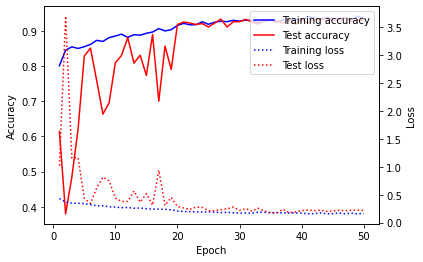

In [8]:
# Plot the training history
utils.plot_history(history, metric='accuracy')

### Classifier 2 (Non-Covid/Covid)

In [9]:
# Define data loader arguments
train_transform = transforms.Compose([
    transforms.RandomResizedCrop((150, 150), scale=(0.08, 1.0), ratio=(0.75, 1.3333333333333333)),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((150, 150)),
    transforms.ToTensor(),
])

dataloader_args = {
    'dataset'        : LungCovidDataset,
    'root_dir'       : './dataset',
    'train_transform': train_transform,
    'test_transform' : test_transform,
    'batch_size'     : 64,
    'shuffle'        : True,
}

In [10]:
# Define model arguments
model_args = {
    'num_input_channels': 1,
    'growth_rate'       : 16,
    'block_config'      : (4, 8, 16, 12),
    'num_init_features' : 32,
    'bn_size'           : 4,
    'drop_rate'         : 0,
    'num_classes'       : 2,
}

In [11]:
# Define training arguments
def lr_scheduler(epoch, learning_rate):
    if epoch % 30 == 0:
        learning_rate /= 10
    return learning_rate

training_args = {
    'device'       :'cuda',
    'epochs'       : 90,
    'optimizer'    : 'Adam',
    'learning_rate': 0.01,
    'lr_scheduler' : lr_scheduler,
    'save_interval': 30,
    'model_path'   : './models/dual-binary-classifier-2.pt',
    'history_path' : './history/dual-binary-classifier-2.pickle',
}

In [12]:
# Create data loaders
train_loader, test_loader, val_loader = utils.get_dataloaders(**dataloader_args)

In [16]:
# Instantiate model
model = DenseNet(**model_args)

In [17]:
# Carry out training on the model
history = utils.train_model(model, train_loader, test_loader, **training_args)

[Sun Mar 21 14:46:25 2021] Training started



[Sun Mar 21 14:46:36 2021] Time elapsed: 0:10 - loss: 0.689 - acc: 0.633 - recall: 0.510 - f1: 0.432 - test_loss: 0.607 - test_acc: 0.692 - test_recall: 0.588 - test_f1: 0.563



[Sun Mar 21 14:46:46 2021] Time elapsed: 0:21 - loss: 0.645 - acc: 0.644 - recall: 0.517 - f1: 0.451 - test_loss: 0.648 - test_acc: 0.632 - test_recall: 0.495 - test_f1: 0.386



[Sun Mar 21 14:46:57 2021] Time elapsed: 0:32 - loss: 0.652 - acc: 0.649 - recall: 0.519 - f1: 0.449 - test_loss: 0.935 - test_acc: 0.636 - test_recall: 0.500 - test_f1: 0.388



[Sun Mar 21 14:47:08 2021] Time elapsed: 0:42 - loss: 0.634 - acc: 0.653 - recall: 0.520 - f1: 0.452 - test_loss: 0.765 - test_acc: 0.468 - test_recall: 0.557 - test_f1: 0.446



[Sun Mar 21 14:47:18 2021] Time elapsed: 0:53 - loss: 0.636 - acc: 0.647 - recall: 0.518 - f1: 0.459 - test_loss: 0.637 - test_acc: 0.637 - test_recall: 0.500 - test_f1: 0.389



[Sun Mar 21 14:47:29 2021] Time elapsed: 1:03 - loss: 0.627 - acc: 0.675 - recall: 0.558 - f1: 0.523 - test_loss: 0.585 - test_acc: 0.717 - test_recall: 0.617 - test_f1: 0.600



[Sun Mar 21 14:47:40 2021] Time elapsed: 1:14 - loss: 0.623 - acc: 0.669 - recall: 0.554 - f1: 0.520 - test_loss: 0.605 - test_acc: 0.636 - test_recall: 0.500 - test_f1: 0.389



[Sun Mar 21 14:47:50 2021] Time elapsed: 1:25 - loss: 0.616 - acc: 0.679 - recall: 0.572 - f1: 0.550 - test_loss: 0.607 - test_acc: 0.662 - test_recall: 0.542 - test_f1: 0.466



[Sun Mar 21 14:48:01 2021] Time elapsed: 1:36 - loss: 0.613 - acc: 0.686 - recall: 0.581 - f1: 0.559 - test_loss: 0.580 - test_acc: 0.760 - test_recall: 0.713 - test_f1: 0.723



[Sun Mar 21 14:48:11 2021] Time elapsed: 1:46 - loss: 0.606 - acc: 0.690 - recall: 0.591 - f1: 0.577 - test_loss: 0.631 - test_acc: 0.656 - test_recall: 0.672 - test_f1: 0.646



[Sun Mar 21 14:48:22 2021] Time elapsed: 1:57 - loss: 0.612 - acc: 0.683 - recall: 0.580 - f1: 0.561 - test_loss: 0.957 - test_acc: 0.455 - test_recall: 0.560 - test_f1: 0.423



[Sun Mar 21 14:48:33 2021] Time elapsed: 2:07 - loss: 0.602 - acc: 0.689 - recall: 0.592 - f1: 0.582 - test_loss: 0.569 - test_acc: 0.737 - test_recall: 0.654 - test_f1: 0.653



[Sun Mar 21 14:48:43 2021] Time elapsed: 2:18 - loss: 0.604 - acc: 0.694 - recall: 0.598 - f1: 0.587 - test_loss: 0.736 - test_acc: 0.638 - test_recall: 0.500 - test_f1: 0.389



[Sun Mar 21 14:48:54 2021] Time elapsed: 2:29 - loss: 0.599 - acc: 0.695 - recall: 0.598 - f1: 0.585 - test_loss: 0.560 - test_acc: 0.724 - test_recall: 0.731 - test_f1: 0.712



[Sun Mar 21 14:49:04 2021] Time elapsed: 2:39 - loss: 0.604 - acc: 0.695 - recall: 0.594 - f1: 0.584 - test_loss: 0.608 - test_acc: 0.637 - test_recall: 0.500 - test_f1: 0.389



[Sun Mar 21 14:49:15 2021] Time elapsed: 2:50 - loss: 0.605 - acc: 0.689 - recall: 0.594 - f1: 0.581 - test_loss: 0.631 - test_acc: 0.637 - test_recall: 0.500 - test_f1: 0.388



[Sun Mar 21 14:49:26 2021] Time elapsed: 3:00 - loss: 0.598 - acc: 0.695 - recall: 0.602 - f1: 0.594 - test_loss: 0.530 - test_acc: 0.752 - test_recall: 0.729 - test_f1: 0.729



[Sun Mar 21 14:49:36 2021] Time elapsed: 3:11 - loss: 0.602 - acc: 0.695 - recall: 0.601 - f1: 0.591 - test_loss: 0.474 - test_acc: 0.838 - test_recall: 0.803 - test_f1: 0.812



[Sun Mar 21 14:49:47 2021] Time elapsed: 3:22 - loss: 0.594 - acc: 0.708 - recall: 0.622 - f1: 0.618 - test_loss: 0.527 - test_acc: 0.763 - test_recall: 0.676 - test_f1: 0.679



[Sun Mar 21 14:49:58 2021] Time elapsed: 3:32 - loss: 0.601 - acc: 0.697 - recall: 0.605 - f1: 0.596 - test_loss: 0.710 - test_acc: 0.495 - test_recall: 0.554 - test_f1: 0.490



[Sun Mar 21 14:50:08 2021] Time elapsed: 3:43 - loss: 0.592 - acc: 0.697 - recall: 0.604 - f1: 0.593 - test_loss: 0.616 - test_acc: 0.636 - test_recall: 0.500 - test_f1: 0.388



[Sun Mar 21 14:50:19 2021] Time elapsed: 3:54 - loss: 0.603 - acc: 0.695 - recall: 0.607 - f1: 0.598 - test_loss: 0.429 - test_acc: 0.860 - test_recall: 0.829 - test_f1: 0.837



[Sun Mar 21 14:50:30 2021] Time elapsed: 4:04 - loss: 0.593 - acc: 0.706 - recall: 0.615 - f1: 0.608 - test_loss: 0.553 - test_acc: 0.668 - test_recall: 0.713 - test_f1: 0.667



[Sun Mar 21 14:50:40 2021] Time elapsed: 4:15 - loss: 0.595 - acc: 0.701 - recall: 0.615 - f1: 0.610 - test_loss: 0.555 - test_acc: 0.677 - test_recall: 0.555 - test_f1: 0.497



[Sun Mar 21 14:50:51 2021] Time elapsed: 4:26 - loss: 0.588 - acc: 0.710 - recall: 0.624 - f1: 0.620 - test_loss: 0.428 - test_acc: 0.850 - test_recall: 0.796 - test_f1: 0.817



[Sun Mar 21 14:51:02 2021] Time elapsed: 4:37 - loss: 0.587 - acc: 0.707 - recall: 0.624 - f1: 0.620 - test_loss: 0.504 - test_acc: 0.762 - test_recall: 0.671 - test_f1: 0.673



[Sun Mar 21 14:51:13 2021] Time elapsed: 4:48 - loss: 0.586 - acc: 0.707 - recall: 0.624 - f1: 0.620 - test_loss: 0.427 - test_acc: 0.868 - test_recall: 0.853 - test_f1: 0.857



[Sun Mar 21 14:51:24 2021] Time elapsed: 4:59 - loss: 0.580 - acc: 0.716 - recall: 0.637 - f1: 0.638 - test_loss: 0.396 - test_acc: 0.842 - test_recall: 0.834 - test_f1: 0.827



[Sun Mar 21 14:51:35 2021] Time elapsed: 5:09 - loss: 0.584 - acc: 0.708 - recall: 0.619 - f1: 0.614 - test_loss: 0.472 - test_acc: 0.827 - test_recall: 0.764 - test_f1: 0.781



[Sun Mar 21 14:51:46 2021] Time elapsed: 5:20 - loss: 0.562 - acc: 0.728 - recall: 0.655 - f1: 0.658 - test_loss: 0.338 - test_acc: 0.892 - test_recall: 0.850 - test_f1: 0.870



[Sun Mar 21 14:51:56 2021] Time elapsed: 5:31 - loss: 0.563 - acc: 0.727 - recall: 0.648 - f1: 0.653 - test_loss: 0.338 - test_acc: 0.887 - test_recall: 0.841 - test_f1: 0.863



[Sun Mar 21 14:52:07 2021] Time elapsed: 5:42 - loss: 0.548 - acc: 0.734 - recall: 0.658 - f1: 0.662 - test_loss: 0.324 - test_acc: 0.893 - test_recall: 0.859 - test_f1: 0.875



[Sun Mar 21 14:52:18 2021] Time elapsed: 5:52 - loss: 0.563 - acc: 0.723 - recall: 0.647 - f1: 0.650 - test_loss: 0.318 - test_acc: 0.897 - test_recall: 0.869 - test_f1: 0.884



[Sun Mar 21 14:52:30 2021] Time elapsed: 6:04 - loss: 0.560 - acc: 0.730 - recall: 0.654 - f1: 0.657 - test_loss: 0.310 - test_acc: 0.905 - test_recall: 0.885 - test_f1: 0.889



[Sun Mar 21 14:52:43 2021] Time elapsed: 6:18 - loss: 0.562 - acc: 0.732 - recall: 0.657 - f1: 0.661 - test_loss: 0.315 - test_acc: 0.901 - test_recall: 0.865 - test_f1: 0.881



[Sun Mar 21 14:52:55 2021] Time elapsed: 6:30 - loss: 0.556 - acc: 0.731 - recall: 0.657 - f1: 0.661 - test_loss: 0.318 - test_acc: 0.897 - test_recall: 0.868 - test_f1: 0.883



[Sun Mar 21 14:53:07 2021] Time elapsed: 6:42 - loss: 0.559 - acc: 0.730 - recall: 0.658 - f1: 0.662 - test_loss: 0.380 - test_acc: 0.865 - test_recall: 0.823 - test_f1: 0.842



[Sun Mar 21 14:53:19 2021] Time elapsed: 6:54 - loss: 0.556 - acc: 0.729 - recall: 0.659 - f1: 0.664 - test_loss: 0.315 - test_acc: 0.889 - test_recall: 0.854 - test_f1: 0.870



[Sun Mar 21 14:53:31 2021] Time elapsed: 7:06 - loss: 0.555 - acc: 0.729 - recall: 0.656 - f1: 0.658 - test_loss: 0.306 - test_acc: 0.902 - test_recall: 0.883 - test_f1: 0.891



[Sun Mar 21 14:53:43 2021] Time elapsed: 7:18 - loss: 0.561 - acc: 0.727 - recall: 0.655 - f1: 0.658 - test_loss: 0.306 - test_acc: 0.899 - test_recall: 0.866 - test_f1: 0.883



[Sun Mar 21 14:53:55 2021] Time elapsed: 7:30 - loss: 0.542 - acc: 0.741 - recall: 0.671 - f1: 0.676 - test_loss: 0.300 - test_acc: 0.900 - test_recall: 0.879 - test_f1: 0.888



[Sun Mar 21 14:54:08 2021] Time elapsed: 7:42 - loss: 0.551 - acc: 0.733 - recall: 0.663 - f1: 0.668 - test_loss: 0.345 - test_acc: 0.885 - test_recall: 0.849 - test_f1: 0.867



[Sun Mar 21 14:54:20 2021] Time elapsed: 7:55 - loss: 0.555 - acc: 0.741 - recall: 0.670 - f1: 0.676 - test_loss: 0.352 - test_acc: 0.882 - test_recall: 0.847 - test_f1: 0.863



[Sun Mar 21 14:54:33 2021] Time elapsed: 8:07 - loss: 0.549 - acc: 0.735 - recall: 0.663 - f1: 0.669 - test_loss: 0.313 - test_acc: 0.899 - test_recall: 0.869 - test_f1: 0.885



[Sun Mar 21 14:54:46 2021] Time elapsed: 8:20 - loss: 0.551 - acc: 0.739 - recall: 0.672 - f1: 0.677 - test_loss: 0.380 - test_acc: 0.865 - test_recall: 0.812 - test_f1: 0.833



[Sun Mar 21 14:54:58 2021] Time elapsed: 8:33 - loss: 0.544 - acc: 0.737 - recall: 0.670 - f1: 0.674 - test_loss: 0.309 - test_acc: 0.893 - test_recall: 0.857 - test_f1: 0.873



[Sun Mar 21 14:55:11 2021] Time elapsed: 8:45 - loss: 0.547 - acc: 0.739 - recall: 0.670 - f1: 0.677 - test_loss: 0.401 - test_acc: 0.833 - test_recall: 0.779 - test_f1: 0.797



[Sun Mar 21 14:55:24 2021] Time elapsed: 8:58 - loss: 0.546 - acc: 0.736 - recall: 0.666 - f1: 0.672 - test_loss: 0.305 - test_acc: 0.892 - test_recall: 0.869 - test_f1: 0.880



[Sun Mar 21 14:55:36 2021] Time elapsed: 9:10 - loss: 0.539 - acc: 0.741 - recall: 0.673 - f1: 0.678 - test_loss: 0.336 - test_acc: 0.898 - test_recall: 0.864 - test_f1: 0.881



[Sun Mar 21 14:55:48 2021] Time elapsed: 9:23 - loss: 0.539 - acc: 0.741 - recall: 0.675 - f1: 0.682 - test_loss: 0.342 - test_acc: 0.882 - test_recall: 0.842 - test_f1: 0.862



[Sun Mar 21 14:56:01 2021] Time elapsed: 9:35 - loss: 0.533 - acc: 0.748 - recall: 0.683 - f1: 0.690 - test_loss: 0.305 - test_acc: 0.898 - test_recall: 0.867 - test_f1: 0.881



[Sun Mar 21 14:56:13 2021] Time elapsed: 9:47 - loss: 0.542 - acc: 0.732 - recall: 0.666 - f1: 0.671 - test_loss: 0.295 - test_acc: 0.898 - test_recall: 0.869 - test_f1: 0.882



[Sun Mar 21 14:56:25 2021] Time elapsed: 10:00 - loss: 0.539 - acc: 0.742 - recall: 0.671 - f1: 0.678 - test_loss: 0.293 - test_acc: 0.892 - test_recall: 0.873 - test_f1: 0.880



[Sun Mar 21 14:56:37 2021] Time elapsed: 10:12 - loss: 0.544 - acc: 0.739 - recall: 0.675 - f1: 0.681 - test_loss: 0.298 - test_acc: 0.885 - test_recall: 0.860 - test_f1: 0.870



[Sun Mar 21 14:56:49 2021] Time elapsed: 10:24 - loss: 0.538 - acc: 0.745 - recall: 0.682 - f1: 0.689 - test_loss: 0.372 - test_acc: 0.863 - test_recall: 0.817 - test_f1: 0.835



[Sun Mar 21 14:57:03 2021] Time elapsed: 10:38 - loss: 0.537 - acc: 0.738 - recall: 0.673 - f1: 0.678 - test_loss: 0.289 - test_acc: 0.900 - test_recall: 0.870 - test_f1: 0.885



[Sun Mar 21 14:57:16 2021] Time elapsed: 10:50 - loss: 0.533 - acc: 0.737 - recall: 0.675 - f1: 0.680 - test_loss: 0.312 - test_acc: 0.898 - test_recall: 0.863 - test_f1: 0.882



[Sun Mar 21 14:57:28 2021] Time elapsed: 11:03 - loss: 0.536 - acc: 0.735 - recall: 0.669 - f1: 0.674 - test_loss: 0.307 - test_acc: 0.900 - test_recall: 0.867 - test_f1: 0.885



[Sun Mar 21 14:57:40 2021] Time elapsed: 11:15 - loss: 0.531 - acc: 0.745 - recall: 0.684 - f1: 0.690 - test_loss: 0.309 - test_acc: 0.887 - test_recall: 0.855 - test_f1: 0.870



[Sun Mar 21 14:57:52 2021] Time elapsed: 11:27 - loss: 0.531 - acc: 0.748 - recall: 0.694 - f1: 0.698 - test_loss: 0.285 - test_acc: 0.890 - test_recall: 0.859 - test_f1: 0.873



[Sun Mar 21 14:58:05 2021] Time elapsed: 11:39 - loss: 0.531 - acc: 0.748 - recall: 0.690 - f1: 0.695 - test_loss: 0.296 - test_acc: 0.890 - test_recall: 0.860 - test_f1: 0.872



[Sun Mar 21 14:58:17 2021] Time elapsed: 11:51 - loss: 0.526 - acc: 0.740 - recall: 0.680 - f1: 0.682 - test_loss: 0.293 - test_acc: 0.884 - test_recall: 0.853 - test_f1: 0.867



[Sun Mar 21 14:58:29 2021] Time elapsed: 12:04 - loss: 0.522 - acc: 0.751 - recall: 0.691 - f1: 0.698 - test_loss: 0.298 - test_acc: 0.884 - test_recall: 0.855 - test_f1: 0.869



[Sun Mar 21 14:58:42 2021] Time elapsed: 12:17 - loss: 0.532 - acc: 0.742 - recall: 0.681 - f1: 0.685 - test_loss: 0.291 - test_acc: 0.887 - test_recall: 0.861 - test_f1: 0.873



[Sun Mar 21 14:58:54 2021] Time elapsed: 12:29 - loss: 0.522 - acc: 0.752 - recall: 0.694 - f1: 0.700 - test_loss: 0.287 - test_acc: 0.887 - test_recall: 0.857 - test_f1: 0.870



[Sun Mar 21 14:59:06 2021] Time elapsed: 12:41 - loss: 0.524 - acc: 0.755 - recall: 0.695 - f1: 0.702 - test_loss: 0.293 - test_acc: 0.887 - test_recall: 0.854 - test_f1: 0.868



[Sun Mar 21 14:59:18 2021] Time elapsed: 12:53 - loss: 0.528 - acc: 0.750 - recall: 0.690 - f1: 0.696 - test_loss: 0.291 - test_acc: 0.887 - test_recall: 0.858 - test_f1: 0.872



[Sun Mar 21 14:59:30 2021] Time elapsed: 13:05 - loss: 0.526 - acc: 0.742 - recall: 0.683 - f1: 0.688 - test_loss: 0.294 - test_acc: 0.885 - test_recall: 0.854 - test_f1: 0.866



[Sun Mar 21 14:59:42 2021] Time elapsed: 13:17 - loss: 0.525 - acc: 0.749 - recall: 0.693 - f1: 0.697 - test_loss: 0.302 - test_acc: 0.885 - test_recall: 0.856 - test_f1: 0.868



[Sun Mar 21 14:59:55 2021] Time elapsed: 13:30 - loss: 0.529 - acc: 0.750 - recall: 0.692 - f1: 0.698 - test_loss: 0.305 - test_acc: 0.887 - test_recall: 0.858 - test_f1: 0.871



[Sun Mar 21 15:00:08 2021] Time elapsed: 13:43 - loss: 0.523 - acc: 0.746 - recall: 0.686 - f1: 0.692 - test_loss: 0.298 - test_acc: 0.884 - test_recall: 0.853 - test_f1: 0.867



[Sun Mar 21 15:00:20 2021] Time elapsed: 13:55 - loss: 0.528 - acc: 0.742 - recall: 0.682 - f1: 0.688 - test_loss: 0.297 - test_acc: 0.887 - test_recall: 0.859 - test_f1: 0.871



[Sun Mar 21 15:00:33 2021] Time elapsed: 14:07 - loss: 0.518 - acc: 0.760 - recall: 0.702 - f1: 0.711 - test_loss: 0.301 - test_acc: 0.887 - test_recall: 0.858 - test_f1: 0.870



[Sun Mar 21 15:00:45 2021] Time elapsed: 14:19 - loss: 0.529 - acc: 0.747 - recall: 0.687 - f1: 0.693 - test_loss: 0.298 - test_acc: 0.887 - test_recall: 0.856 - test_f1: 0.871



[Sun Mar 21 15:00:57 2021] Time elapsed: 14:32 - loss: 0.513 - acc: 0.757 - recall: 0.703 - f1: 0.709 - test_loss: 0.305 - test_acc: 0.884 - test_recall: 0.845 - test_f1: 0.861



[Sun Mar 21 15:01:10 2021] Time elapsed: 14:44 - loss: 0.514 - acc: 0.752 - recall: 0.699 - f1: 0.705 - test_loss: 0.297 - test_acc: 0.887 - test_recall: 0.849 - test_f1: 0.864



[Sun Mar 21 15:01:22 2021] Time elapsed: 14:56 - loss: 0.526 - acc: 0.747 - recall: 0.692 - f1: 0.697 - test_loss: 0.298 - test_acc: 0.888 - test_recall: 0.860 - test_f1: 0.874



[Sun Mar 21 15:01:34 2021] Time elapsed: 15:09 - loss: 0.520 - acc: 0.745 - recall: 0.689 - f1: 0.694 - test_loss: 0.295 - test_acc: 0.889 - test_recall: 0.862 - test_f1: 0.873



[Sun Mar 21 15:01:47 2021] Time elapsed: 15:22 - loss: 0.523 - acc: 0.748 - recall: 0.691 - f1: 0.696 - test_loss: 0.297 - test_acc: 0.890 - test_recall: 0.862 - test_f1: 0.875



[Sun Mar 21 15:02:00 2021] Time elapsed: 15:34 - loss: 0.525 - acc: 0.749 - recall: 0.696 - f1: 0.700 - test_loss: 0.290 - test_acc: 0.887 - test_recall: 0.861 - test_f1: 0.872



[Sun Mar 21 15:02:12 2021] Time elapsed: 15:47 - loss: 0.528 - acc: 0.745 - recall: 0.687 - f1: 0.693 - test_loss: 0.298 - test_acc: 0.886 - test_recall: 0.857 - test_f1: 0.869



[Sun Mar 21 15:02:25 2021] Time elapsed: 16:00 - loss: 0.519 - acc: 0.749 - recall: 0.693 - f1: 0.698 - test_loss: 0.297 - test_acc: 0.887 - test_recall: 0.862 - test_f1: 0.872



[Sun Mar 21 15:02:37 2021] Time elapsed: 16:12 - loss: 0.524 - acc: 0.748 - recall: 0.691 - f1: 0.697 - test_loss: 0.299 - test_acc: 0.889 - test_recall: 0.862 - test_f1: 0.874



[Sun Mar 21 15:02:50 2021] Time elapsed: 16:24 - loss: 0.518 - acc: 0.754 - recall: 0.699 - f1: 0.704 - test_loss: 0.295 - test_acc: 0.886 - test_recall: 0.861 - test_f1: 0.871



[Sun Mar 21 15:03:02 2021] Time elapsed: 16:37 - loss: 0.516 - acc: 0.755 - recall: 0.704 - f1: 0.709 - test_loss: 0.300 - test_acc: 0.887 - test_recall: 0.854 - test_f1: 0.867



[Sun Mar 21 15:03:14 2021] Time elapsed: 16:49 - loss: 0.513 - acc: 0.752 - recall: 0.696 - f1: 0.702 - test_loss: 0.297 - test_acc: 0.887 - test_recall: 0.857 - test_f1: 0.872



[Sun Mar 21 15:03:27 2021] Time elapsed: 17:01 - loss: 0.521 - acc: 0.755 - recall: 0.697 - f1: 0.703 - test_loss: 0.299 - test_acc: 0.885 - test_recall: 0.855 - test_f1: 0.867



[Sun Mar 21 15:03:39 2021] Time elapsed: 17:13 - loss: 0.519 - acc: 0.752 - recall: 0.699 - f1: 0.704 - test_loss: 0.298 - test_acc: 0.887 - test_recall: 0.859 - test_f1: 0.870



[Sun Mar 21 15:03:51 2021] Time elapsed: 17:26 - loss: 0.522 - acc: 0.747 - recall: 0.693 - f1: 0.697 - test_loss: 0.298 - test_acc: 0.890 - test_recall: 0.859 - test_f1: 0.872



[Sun Mar 21 15:04:04 2021] Time elapsed: 17:38 - loss: 0.520 - acc: 0.750 - recall: 0.695 - f1: 0.700 - test_loss: 0.301 - test_acc: 0.889 - test_recall: 0.858 - test_f1: 0.870

[Sun Mar 21 15:04:04 2021] Training complete - Time elapsed: 17:38


In [18]:
# Save the results of training
utils.save_model(model, training_args['model_path'])

utils.save_history(history, training_args['history_path'])

In [13]:
# Load the results of training
model = utils.load_model(training_args['model_path'])

history = utils.load_history(training_args['history_path'])

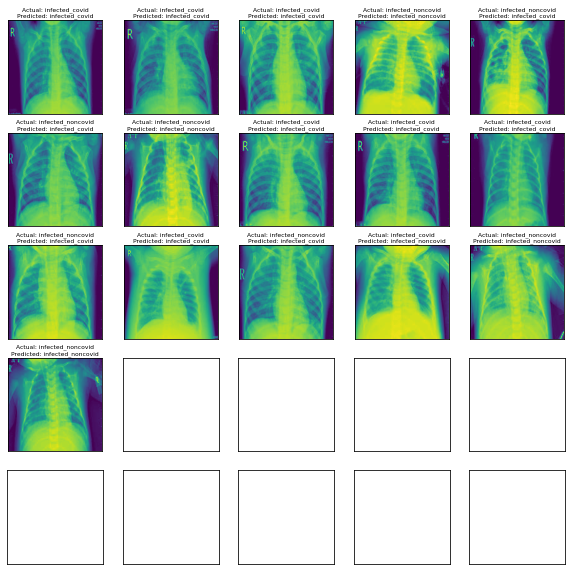

Validation loss: 0.654 - Validation accuracy: 0.687 - Validation F1-score: 0.676 - Validation recall: 0.687


In [14]:
# Evaluate the performance of the model on the validation set
model.cuda()

results = utils.run_model(model, val_loader, show_results=True)

print(f"Validation loss: {results['loss']:.3f} -",
      f"Validation accuracy: {results['accuracy']:.3f} -",
      f"Validation F1-score: {results['f1_score']:.3f} -",
      f"Validation recall: {results['recall']:.3f}")

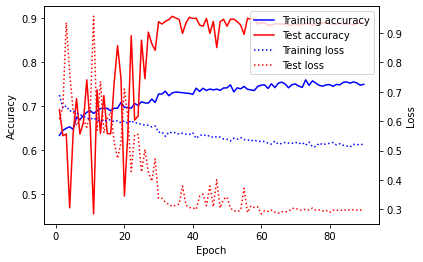

In [15]:
# Plot the training history
utils.plot_history(history, metric='accuracy')

### Combined

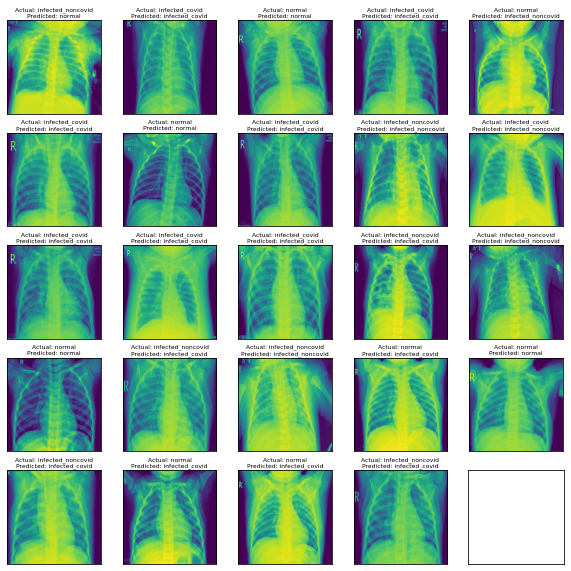

Validation loss: 1.024 - Validation accuracy: 0.722 - Validation F1-score: 0.571 - Validation recall: 0.583


In [16]:
class DualBinaryClassifier(nn.Module):
    def __init__(self, model1_path, model2_path, device='cuda'):
        super().__init__()
        self.device = device
        self.model1 = utils.load_model(model1_path)
        self.model1.to(device)
        self.model2 = utils.load_model(model2_path)
        self.model2.to(device)
    
    def forward(self, x):
        logits = self.model1(x)
        output = F.log_softmax(logits, dim=1)
        infected = (torch.exp(output).max(dim=1)[1] == 1)
        
        new_logits = torch.zeros((logits.shape[0], logits.shape[1]+1)).to(self.device)
        new_logits[:, :-1] = logits
        new_logits[:, 0][infected] = 0
        new_logits[:, 1:][infected] = self.model2(x[infected])
        return new_logits

model = DualBinaryClassifier(model1_path='./models/dual-binary-classifier-1.pt',
                             model2_path='./models/dual-binary-classifier-2.pt')

dataloader_args = {
    'dataset'        : LungDataset,
    'root_dir'       : './dataset',
    'train_transform': train_transform,
    'test_transform' : test_transform,
    'batch_size'     : 64,
    'shuffle'        : True,
}
_, _, val_loader = utils.get_dataloaders(**dataloader_args)

results = utils.run_model(model, val_loader, show_results=True)

print(f"Validation loss: {results['loss']:.3f} -",
      f"Validation accuracy: {results['accuracy']:.3f} -",
      f"Validation F1-score: {results['f1_score']:.3f} -",
      f"Validation recall: {results['recall']:.3f}")